## Proposta

Este trabalho propôs a criação de um sistema utilizando algoritmos de aprendizagem de máquina para maximizar a métrica de hit ratio. [1](https://www.cloudflare.com/pt-br/learning/cdn/what-is-a-cache-hit-ratio/#:~:text=A%20cache%20hit%20ratio%20is,at%20fulfilling%20requests%20for%20content.)

$$\frac{\textrm{number of cache hits}}{\textrm{number of cache hits + number of cache misses}} = {\textrm{hit ratio}}{\textrm{    }}(1)$$ 

<br><br>
Os passos do sistema estão descritos no diagrama abaixo:
<center><img src="images/diagrama.png"></center>

_A. Obtenção dos dados_

Para avaliar o desempenho do sistema proposto foi utilizado um conjunto de dados sintéticos gerados utilizando o código utilizado no projeto DeepCache[2](https://github.com/eman-ramadan/deepcache_netai2018). Os dados gerados seguem a distribuição Zipf para simular a popularidade de cada item ao longo do tempo. O conjunto de dados gerados possue duas colunas, Object_ID e request_time. Para o trabalho foi adicionando uma nova coluna ao conjunto de dados chamado size.

* **Object_ID**: Número inteiro representando o ID do objeto que está sendo requisitado.
* **request_time**: Tempo incremental em segundos representando o momento que o Object_ID foi requisitado.
* **size**: Tamanho do Object_ID em bytes seguindo a distribuição normal.

Na etapa de pré-processamento são adicionadas novas colunas para serem utilizadas como _features_ nos algoritmos de aprendizagem de máquina. As novas colunas são:
* **time**: Conversão da coluna request_time para o formato data e hora, começando em 01/08/2018.
* **hour**: Agrupamento da coluna request_time em intervalos de 3600 segundos e atribuido a cada intervalo um valor representando a hora que ocorreu a requisição.
* **total_requests_1H**: Janela deslizante de hora em hora incremental com o número de acessos do object_ID.
* **mean_requests_2H**: Janela deslizante de duas horas com o valor médio da coluna total_requests_1H.
* **count**: Total de acessos que um object_ID recebeu.

Por fim na etapa de pré-processamento é criada uma coluna chamada **cache** para classificar a requisição. Caso o valor dela seja 1 significa que o _object_ID_ tem uma maior probilidade de ser um item popular e que já deva estar ou precise estar em _cache_ e caso o valor seja 0 significa que o item tem uma probilidade menor de ser popular e que não precisa ser armazenado na cache.
O método adotado para a classificação foi se o _object_ID_ da linha atual aparece pelo menos uma vez nos próximos 15 _frames_ do conjunto de dados.


_C. Algoritmos de classificação utilizados_

Para este trabalho foi utilizada integralmente a linguagem de programação _Python_.
_Python_ é uma linguagem de programação de alto nível, multiparadigma e interpretada. Devido ao fato de ser uma linguagem fácil de ser apredendida e por todo seu ecossistema, tanto de bibliotecas como da comunidade, ela se tornou uma das linguagens mais utilizadas para tarefas de análise de dados, aprendizagem de máquina e inteligência artificial. [2](https://marutitech.com/python-data-science/) [3](https://www.davekuhlman.org/python_book_01.pdf)

Os algoritimos de classificação escolhidos para esse trabalho foram: _Random Forest_, _Gradient Boosting_ e _Decision Tree_. Foram utilizados os algoritmos implementados no pacote _Scikit-learn_ neste trabalho. O _Scikit-learn_ é uma biblioteca da linguagem de programação _Python_ que possui vários algoritmos de aprendizagem de máquina para problemas supervisionados e não supervisionados. [4](https://jmlr.org/papers/v12/pedregosa11a.html)


_D. Algoritmos de cache utilizados_

Para este trabalho foram selecionados dois algoritmos de _cache_: 

* **_Least Recently Used_ (LRU)**: Remove o último objeto que está a mais tempo sem ser utilizado quando o cache excede o seu tamanho máximo.
* **_Least Frequently Used_ (LFU)**: Remoeve o objeto que é menos utilizado baseado em sua frequência. Ele utiliza um contador para cada objeto para contar a frequência de cada objeto, quando o cache excede o seu tamanho máximo ele remove a página menos frequente.

## Experimentos

Os experimentos foram dividios em três partes. Primeiramente o treinamento e avaliação dos algoritmos de classificação no conjunto de dados de treinamento com o objetivo de avaliar o algoritmo de classificação com melhor desempenho. Posteriormente, no conjunto de dados de testes, foi avaliada a métrica de _hit ratio_ dos algortimos de _cache_ e dos algoritmos de aprendizagem de máquina em conjunto com os algoritmos de _cache_ com objetivo de saber se existe um ganho de _hit ratio_ na utilização de um algoritmo de classificação antes de rodar o algoritmo de cache e em qual dos algoritmos, LRU ou LFU, esse ganho é maior. Por fim foi avaliado o tempo médio gasto na execução dos algoritmos de _cache_ e dos algoritmos de classificação em conjunto do algoritmo de _cache_ para avaliar a aplicabilidade da técnica utilizando o algoritmo de classificação no mundo real.


_A. Métricas_

Para avaliar os modelos gerados pelos algoritmos de classificação foram utilizadas métricas calculadas a partir de uma matriz de confusão [5](https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c).
A matriz de confusão indica em formato de tabela os erros e acertos do modelo. A tabela abaixo demostra um exemplo de uma matriz de confusão: 

|   | Valor previsto positivo | Valor previsto negativo |
|---|---|---|
| **Valor real positivo** |  <center>Verdadeiro Positivo<br>(VP)</center> |  <center>Falso Negativo<br>(FN)</center> |
| **Valor real negativo** |  <center>Falso Positivo<br>(FP)</center> | <center>Verdadeiro Negativo<br>(VN)</center> |

<center> Matriz de confusão</center>


* **Verdadeiro Positivo (VP)**: Classificação correta dos valores positivos previstos.
* **Falso Negativo (FN)**: Classificação errada dos valores positivos previstos.
* **Falso Positivo (FP)**: Classificação errada dos valores negativos previstos.
* **Verdadeiro Negativo (VN)**: Classificação correta dos valores negativos previstos.


A partir desses valores é calculada as seguintes métricas para avaliação dos modelos:

* **Acurácia**: Indica a perfomance geral que o modelo classificou corretamente, sua fórmula é:
$$\frac{{VP} + {VN}}{{VP} + {VN} + {FP} + {FN}}$$ 


* **Precisão**: Indica a quantidade das classificações positivas que o modelo fez e quantas estão corretas, sua formulá é:
$$\frac{{VP}}{{VP} + {FP}}$$ 


* **_Recall_**: Indica a quantidade das classificações positivas corretas, sua formulá é:
$$\frac{{VP}}{{VP} + {FN}}$$ 


* **_F1-Score_**: Média harmônica entre precisão e _recall_, sua formulá é:
$$2 * \frac{{Precisão} * {Recall}}{{Precisão} + {Recall}}$$



Posteriormente para avaliar o desemepenho dos modelos em conjunto com os algoritmos de cache no sistema proposto foi utilizado a métrica de _hit ratio_ da equação (1).
No fim para avaliar o tempo médio do sistema, foram selecionados 2000 mil requisições do conjunto de teste e medido o tempo de cada requisição no sistema apenas com os algoritmos de cache e posteriormente nos sistemas propostos com os algoritmos de classificação.

## Parte prática

In [2]:
import numpy as np
import pandas as pd
import math, random
from scipy import special
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime, timedelta

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
np.random.seed(0)

In [5]:
df = pd.read_csv("final_datasets/teste.csv")
df = df.set_index("time")
df['cache'] = df['cache'].astype(int)

display(df.head())

,object_ID,hour,size,total_requests_1H,mean_requests_2H,count,cache
time,,,,,,,
2018-08-01 00:00:01.207572,1,0,59283,1.0,1.0,1.0,1
2018-08-01 00:00:01.496262,1,0,59283,2.0,1.5,2.0,1
2018-08-01 00:00:02.023976,20,0,48399,1.0,1.0,1.0,0
2018-08-01 00:00:02.777488,29,0,5385,1.0,1.0,1.0,0
2018-08-01 00:00:03.251327,37,0,46423,1.0,1.0,1.0,0


Separação dos dados em dados de treinamento e dados de testes

In [6]:
train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=False)

print('Número de observações nos dados de treinamento:', len(train))
print('Número de observações nos dados de testes:',len(test))

Número de observações nos dados de treinamento: 201341
Número de observações nos dados de testes: 86290


Escolhendo as _features_ que serão utilizadas pelos modelos para prever a classificação da coluna _cache_

In [7]:
features = df.columns[1:6]
print('Features escolhidas:', ', '.join(features))

Features escolhidas: hour, size, total_requests_1H, mean_requests_2H, count


In [8]:
y, uniques = pd.factorize(train['cache'])

### Execução e avaliação dos algoritmos classificadores

#### Decision Tree

In [9]:
clf_tree = DecisionTreeClassifier(random_state=0, max_depth=5)
clf_tree.fit(train[features], y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [10]:
# Realiza a previsão da coluna cache no conjunto de dados de testes
preds_tree = uniques[clf_tree.predict(test[features])]

In [11]:
pd.crosstab(test['cache'], preds_tree, rownames=['Valores reais'], colnames=['Valores previstos'])

Valores previstos,0,1
Valores reais,,
0,33743,11671
1,14010,26866


In [12]:
def calcula_metricas_classificadores(test, preds_algo):
  accuracy = round(accuracy_score(test['cache'], preds_algo), 2) * 100
  precision = round(precision_score(test['cache'], preds_algo), 2) * 100
  recall = round(recall_score(test['cache'], preds_algo), 4) * 100
  f1 = round(f1_score(test['cache'], preds_algo), 2) * 100

  print(f"Acurácia: {accuracy}%")
  print(f"Precisão: {precision}%")
  print(f"Recall: {recall}%")
  print(f"F1-Score: {f1}%")

In [13]:
calcula_metricas_classificadores(test, preds_tree)

Acurácia: 70.0%
Precisão: 70.0%
Recall: 65.73%
F1-Score: 68.0%


In [14]:
importances = pd.DataFrame({'feature':features,'Importância':np.round(clf_tree.feature_importances_,3)})
importances = importances.sort_values('Importância',ascending=False).set_index('feature')
display(importances)

,Importância
feature,
total_requests_1H,0.760
count,0.158
hour,0.049
mean_requests_2H,0.024
size,0.009


#### Random Forest

In [15]:
clf_rf = RandomForestClassifier(n_jobs=12, random_state=0)
clf_rf.fit(train[features], y)

/home/alexandre/.asdf/installs/python/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=12,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
# Realiza a previsão da coluna cache no conjunto de dados de testes
preds_rf = uniques[clf_rf.predict(test[features])]

In [17]:
pd.crosstab(test['cache'], preds_rf, rownames=['Valores reais'], colnames=['Valores previstos'])

Valores previstos,0,1
Valores reais,,
0,25546,19868
1,12014,28862


In [18]:
calcula_metricas_classificadores(test, preds_rf)

Acurácia: 63.0%
Precisão: 59.0%
Recall: 70.61%
F1-Score: 64.0%


In [19]:
importances = pd.DataFrame({'feature':features,'Importância':np.round(clf_rf.feature_importances_,3)})
importances = importances.sort_values('Importância',ascending=False).set_index('feature')
display(importances)

,Importância
feature,
count,0.354
total_requests_1H,0.201
mean_requests_2H,0.199
hour,0.142
size,0.103


#### Gradient Boosting

In [20]:
clf_gbc = GradientBoostingClassifier(random_state=0)
clf_gbc.fit(train[features], y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
# Realiza a previsão da coluna cache no conjunto de dados de testes
preds_gbc = uniques[clf_gbc.predict(test[features])]

In [22]:
pd.crosstab(test['cache'], preds_gbc, rownames=['Valores reais'], colnames=['Valores previstos'])

Valores previstos,0,1
Valores reais,,
0,29961,15453
1,12974,27902


In [23]:
calcula_metricas_classificadores(test, preds_gbc)

Acurácia: 67.0%
Precisão: 64.0%
Recall: 68.26%
F1-Score: 66.0%


In [24]:
importances = pd.DataFrame({'feature':features,'Importância':np.round(clf_gbc.feature_importances_,3)})
importances = importances.sort_values('Importância',ascending=False).set_index('feature')
display(importances)

,Importância
feature,
total_requests_1H,0.351
mean_requests_2H,0.343
count,0.177
size,0.065
hour,0.064


# ESCREVER A CONCLUSÃO AMANHA

### Execução e avaliação dos algoritmos de cache com e sem os classificadores

In [25]:
from lru import LRU
from lfu import LFU

### Execução apenas dos algoritmos de cache

In [26]:
def executa_apenas_cache(algoritmo_cache, capacidade_cache, df):
  cache = algoritmo_cache(capacity=capacidade_cache)
  cache_status = {}
  cache_counter = []
  c = 0 

  events = df['object_ID'].values

  for event_key in events:
    if event_key not in cache_status:
      cache_status[event_key] = {
          'found_in_cache': 0,
          'n_requested': 0
      }

    item = cache.get(event_key)
    if item != -1:
      c += 1
      cache_status[event_key]['found_in_cache'] += 1
    else:
      cache.put(event_key, 1)

    cache_counter.append(c)
    cache_status[event_key]['n_requested'] += 1
    cache_status[event_key]['hit_ratio'] = round(cache_status[event_key]['found_in_cache'] / cache_status[event_key]['n_requested'], 2)

  final_hit_ratios = pd.DataFrame(cache_status).transpose().sort_values("hit_ratio", ascending=False)
  
  
  return cache_counter, final_hit_ratios

In [27]:
counter_LRU, df_hit_ratios_LRU = executa_apenas_cache(LRU, 15, test)
found_in_cache_total_LRU = df_hit_ratios_LRU['found_in_cache'].sum()
n_requested_total_LRU = df_hit_ratios_LRU['n_requested'].sum()
hit_ratio_LRU = round(( found_in_cache_total_LRU / n_requested_total_LRU ) * 100, 2)

print('Hit Ratio LRU:', hit_ratio_LRU)

Hit Ratio LRU: 58.61


In [28]:
counter_LFU, df_hit_ratios_LFU = executa_apenas_cache(LFU, 15, test)
found_in_cache_total_LFU = df_hit_ratios_LFU['found_in_cache'].sum()
n_requested_total_LFU = df_hit_ratios_LFU['n_requested'].sum()
hit_ratio_LFU = round(( found_in_cache_total_LFU / n_requested_total_LFU ) * 100, 2)

print('Hit Ratio LFU:', hit_ratio_LFU)

Hit Ratio LFU: 46.45


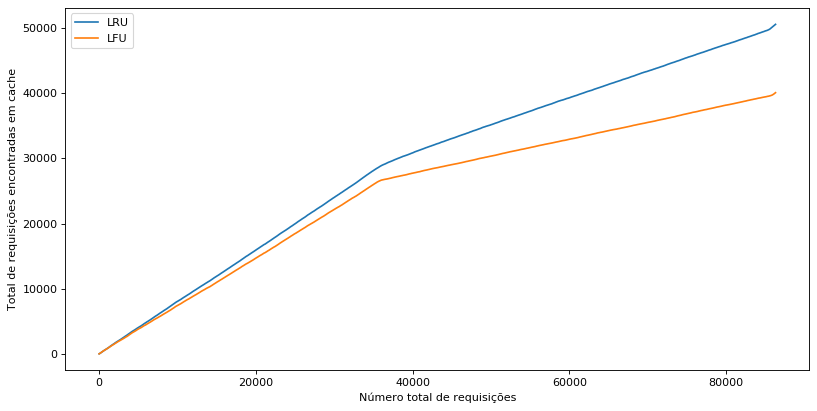

In [29]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(counter_LRU, label="LRU")
plt.plot(counter_LFU, label="LFU")
plt.xlabel('Número total de requisições')
plt.ylabel('Total de requisições encontradas em cache')
plt.legend()
plt.show()

### Execução dos algoritmos de cache com os algoritmos de classificação

In [63]:
def executa_sistema_proposto(algoritmo_cache, capacidade_cache, df):
  cache = algoritmo_cache(capacity=capacidade_cache)
  cache_status = {}
  cache_counter = []
  c = 0 



  for i, row in df.iterrows():
    event_key = row['object_ID']
    can_cache = row['preds']
    
    if event_key not in cache_status:
      cache_status[event_key] = {
          'found_in_cache': 0,
          'n_requested': 0
      }
  
    if not can_cache:
      continue
    
    item = cache.get(event_key)
    if item != -1:
      c += 1
      cache_status[event_key]['found_in_cache'] += 1
    else:
      cache.put(event_key, 1)

    cache_counter.append(c)
    cache_status[event_key]['n_requested'] += 1
    cache_status[event_key]['hit_ratio'] = round(cache_status[event_key]['found_in_cache'] / cache_status[event_key]['n_requested'], 2)

  final_hit_ratios = pd.DataFrame(cache_status).transpose().sort_values("hit_ratio", ascending=False)
  
  
  return cache_counter, final_hit_ratios

#### Sistema proposto utilizando Decision Trees

In [77]:
test_tree = test.copy()
test_tree['preds'] = preds_tree


counter_LRU_DT, df_hit_ratios_LRU_DT = executa_sistema_proposto(LRU, 15,test_tree)
found_in_cache_total_LRU_DT = df_hit_ratios_LRU_DT['found_in_cache'].sum()
n_requested_total_LRU_DT = df_hit_ratios_LRU_DT['n_requested'].sum()
hit_ratio_LRU_DT = round(( found_in_cache_total_LRU_DT / n_requested_total_LRU_DT ) * 100, 2)

print('Hit Ratio LRU + Decision Tree:', hit_ratio_LRU_DT)

Hit Ratio LRU + Decision Tree: 96.93


In [65]:
test_tree = test.copy()
test_tree['preds'] = preds_tree


counter_LFU_DT, df_hit_ratios_LFU_DT = executa_sistema_proposto(LFU, 15, test_tree)
found_in_cache_total_LFU_DT = df_hit_ratios_LFU_DT['found_in_cache'].sum()
n_requested_total_LFU_DT = df_hit_ratios_LFU_DT['n_requested'].sum()
hit_ratio_LFU_DT = round(( found_in_cache_total_LFU_DT / n_requested_total_LFU_DT ) * 100, 2)

print('Hit Ratio LFU + Decision Tree:', hit_ratio_LFU_DT)

Hit Ratio LFU + Decision Tree: 75.73


#### Sistema proposto utilizando Random Forest

In [66]:
test_rf = test.copy()
test_rf['preds'] = preds_rf


counter_LRU_RF, df_hit_ratios_LRU_RF = executa_sistema_proposto(LRU, 15, test_rf)
found_in_cache_total_LRU_RF = df_hit_ratios_LRU_RF['found_in_cache'].sum()
n_requested_total_LRU_RF = df_hit_ratios_LRU_RF['n_requested'].sum()
hit_ratio_LRU_RF = round(( found_in_cache_total_LRU_RF / n_requested_total_LRU_RF ) * 100, 2)

print('Hit Ratio LRU + Random Forest:', hit_ratio_LRU_RF)

Hit Ratio LRU + Random Forest: 79.58


In [67]:
test_rf = test.copy()
test_rf['preds'] = preds_rf


counter_LFU_RF, df_hit_ratios_LFU_RF = executa_sistema_proposto(LFU, 15, test_rf)
found_in_cache_total_LFU_RF = df_hit_ratios_LFU_RF['found_in_cache'].sum()
n_requested_total_LFU_RF = df_hit_ratios_LFU_RF['n_requested'].sum()
hit_ratio_LFU_RF = round(( found_in_cache_total_LFU_RF / n_requested_total_LFU_RF ) * 100, 2)

print('Hit Ratio LFU + Random Forest:', hit_ratio_LFU_RF)

Hit Ratio LFU + Random Forest: 64.96


#### Sistema proposto utilizando Gradient Boosting

In [68]:
test_gbc = test.copy()
test_gbc['preds'] = preds_gbc


counter_LRU_GBC, df_hit_ratios_LRU_GBC = executa_sistema_proposto(LRU, 15, test_gbc)
found_in_cache_total_LRU_GBC = df_hit_ratios_LRU_GBC['found_in_cache'].sum()
n_requested_total_LRU_GBC = df_hit_ratios_LRU_GBC['n_requested'].sum()
hit_ratio_LRU_GBC = round(( found_in_cache_total_LRU_GBC / n_requested_total_LRU_GBC ) * 100, 2)

print('Hit Ratio LRU + Gradient Boosting:', hit_ratio_LRU_GBC)

Hit Ratio LRU + Gradient Boosting: 93.11


In [69]:
test_gbc = test.copy()
test_gbc['preds'] = preds_gbc


counter_LFU_GBC, df_hit_ratios_LFU_GBC = executa_sistema_proposto(LFU, 15, test_gbc)
found_in_cache_total_LFU_GBC = df_hit_ratios_LFU_GBC['found_in_cache'].sum()
n_requested_total_LFU_GBC = df_hit_ratios_LFU_GBC['n_requested'].sum()
hit_ratio_LFU_GBC = round(( found_in_cache_total_LFU_GBC / n_requested_total_LFU_GBC ) * 100, 2)

print('Hit Ratio LFU + Gradient Boosting:', hit_ratio_LFU_GBC)

Hit Ratio LFU + Gradient Boosting: 73.11


In [70]:
print(n_requested_total_LRU_DT)
print(n_requested_total_LFU_DT)
print(n_requested_total_LRU_RF)
print(n_requested_total_LFU_RF)
print(n_requested_total_LRU_GBC)
print(n_requested_total_LFU_GBC)

38537.0
38537.0
48730.0
48730.0
43355.0
43355.0


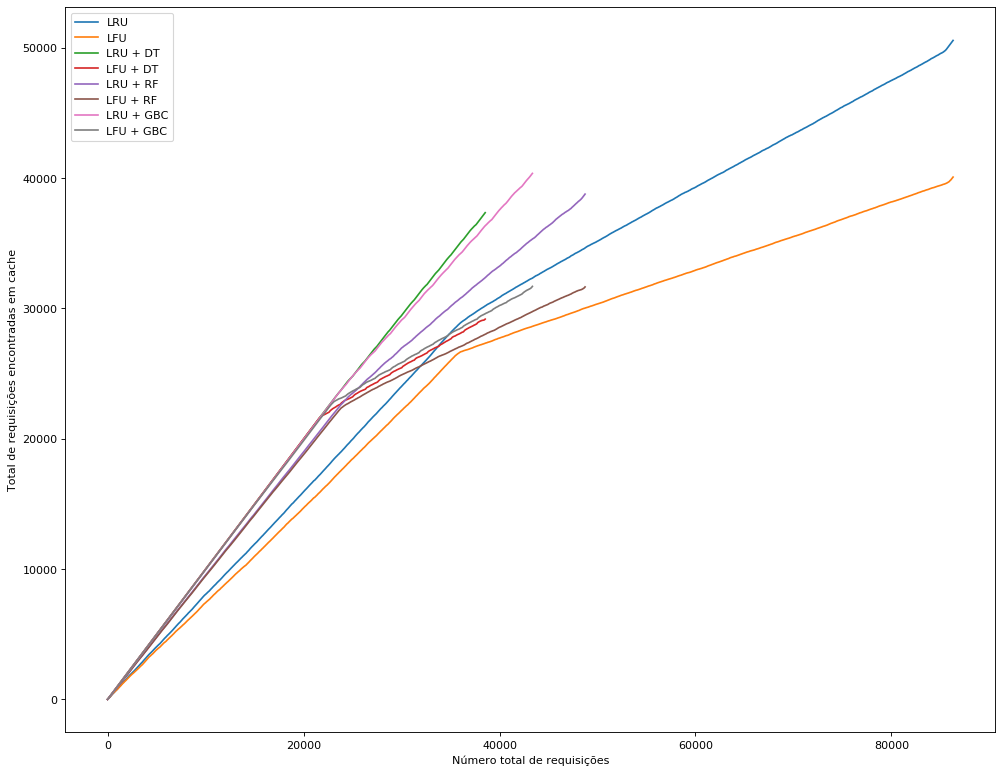

In [71]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plt.plot(counter_LRU, label="LRU")
plt.plot(counter_LFU, label="LFU")

plt.plot(counter_LRU_DT, label="LRU + DT")
plt.plot(counter_LFU_DT, label="LFU + DT")
plt.plot(counter_LRU_RF, label="LRU + RF")
plt.plot(counter_LFU_RF, label="LFU + RF")
plt.plot(counter_LRU_GBC, label="LRU + GBC")
plt.plot(counter_LFU_GBC, label="LFU + GBC")
plt.xlabel('Número total de requisições')
plt.ylabel('Total de requisições encontradas em cache')
plt.legend()
plt.show()

Se o algoritmo de classificação diz que n tem necessidade de consultar o algoritmo em cache ele para ali.
**necessita normalizar os valores para plotar**